## Import dependances

In [1]:
import phoebe as phb, numpy as np

import sys
sys.path.append('../')
from Functions.phoebeCustom import saveSimulation, normaliseFluxes

## Initalise Binary

Initialise PHOEBE with the default binary + warnings

In [2]:
lpgger = phb.logger()
bSystem = phb.default_binary()

## Control Elements

These should stay the same as they shouldn't have any impact on the lightcurve.

In [3]:
period = 10
bSystem['period@binary'] = period
bSystem.add_dataset(
    'lc',
    times = phb.linspace(0, period, 1001),
    dataset = 'lc01',
    overwrite=True
)
# bSystem.add_dataset(
#     'rv',
#     times = phb.linspace(0, period, 1001),
#     dataset = 'rv01',
#     overwrite=True
# )

bSystem.flip_constraint('mass@primary', 'sma@binary')
bSystem['mass@primary@component'] = 1
bSystem['teff@primary'] = 5780

## q Parameter Space

Flip constraint so that q can now influence the radius - sets $\log(g)$ ($\log$ of surface gravity) constant

In [4]:
bSystem.flip_constraint('logg@secondary', 'requiv@secondary') # Flip constrain so radius of secondary changes with mass

def printQ(): 
    print(f'Primary mass: {bSystem['mass@primary@component'].get_value()} | \
        Secondary mass: {bSystem['mass@secondary@component'].get_value()} | \
            Mass ratio: {bSystem['q@binary@component'].get_value()} | \
        Primary radius: {bSystem['requiv@primary@component'].get_value()} | \
        Secondary radius: {bSystem['requiv@secondary@component'].get_value()}')

In [5]:
q = np.arange(1.06, 0.89, -.02)
print(q)

[1.06 1.04 1.02 1.   0.98 0.96 0.94 0.92 0.9 ]


## Teff Parameter Space

In [6]:
def printT():
    print(f'Primary Teff: {bSystem['teff@primary@component'].get_value()} | \
      Secondary Teff: {bSystem['teff@secondary@component'].get_value()} | \
          Teff ratio: {bSystem['teffratio@binary@component'].get_value()}')

In [7]:
teff = np.arange(5930, 5370, -50, dtype=float)
print(teff)

[5930. 5880. 5830. 5780. 5730. 5680. 5630. 5580. 5530. 5480. 5430. 5380.]


## Simulation and Plotting

In [8]:
for teff_i in teff:
    for q_i in q:
        bSystem['teff@secondary@component'] = teff_i
        bSystem['q@binary@component'] = q_i
        bSystem.run_compute(distortion_method='rotstar', model=f'q{str(round(bSystem['q@binary@component'].get_value(), 2)).replace('.','')}_teff{bSystem['teff@secondary@component'].get_value():.0f}', overwrite=True)

100%|██████████| 1001/1001 [00:06<00:00, 162.50it/s]


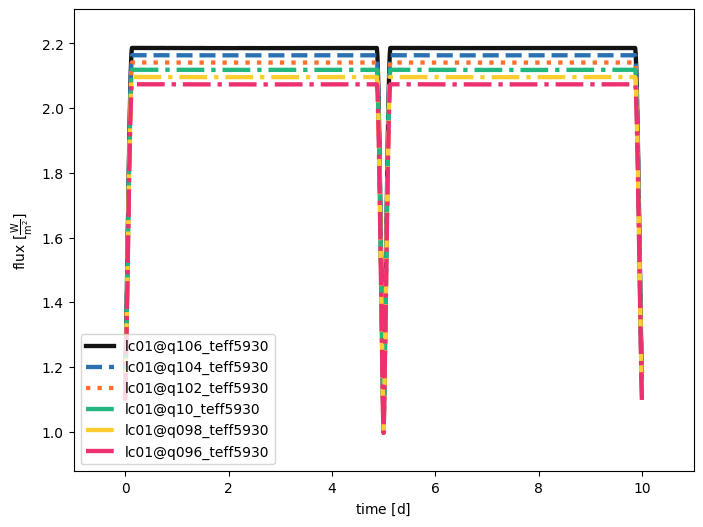

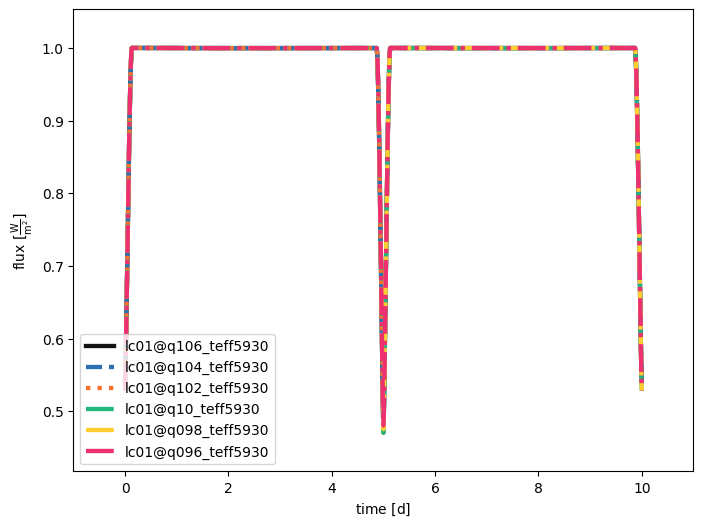

In [9]:
bSystemNormal = normaliseFluxes(bSystem)

afig1, mpltfig1 = bSystem.plot(show=True, legend=True, title='Flux Not Normalised')
afig2, mpltfig2 = bSystemNormal.plot(show=True, legend=True, title='Flux Normalised')

In [ ]:
for model in bSystem.models:
    fluxes = bSystem[f'{model}@fluxes'].get_value()
    print(f'Range in flux: {np.ptp(fluxes[:100])}, Min flux: {np.min(fluxes)}')

## Save Simulation

In [ ]:
bSystem.models

In [9]:
# saveSimulation(bSystem=bSystem, filename='G_range')
bSystem.save('Grange.phoebe')

'Grange.phoebe'